In [29]:
import pandas as pd
import numpy as np

In [30]:
flats_df = pd.read_csv("MSK/MSK_addr_area_price_lon_lat.csv", sep=",")

In [31]:
flats_df.head()

,address,area,price,longtitude,latitude
0,"Москва, ул. Сущёвский Вал, 55",155.0,286000,55.793698,37.614410
1,"Москва, пос. Московский, дер. Румянцево, д. 2,...",75.4,116428,55.633963,37.425468
2,"Москва, Ленинский пр-т, 95Б",106.1,282752,55.672905,37.524318
3,"Москва, Конаковский пр.",82.0,206024,55.845911,37.482151
4,"Москва, пр-т Ленинградский, ЖК «Царская площадь»",94.5,275132,55.784779,37.562703


In [53]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

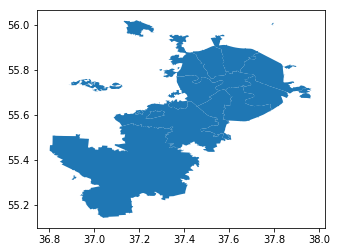

In [54]:
spb_street_map = gpd.read_file('exportsh/MSK/Central Administrative Okrug_AL5.shp', encoding="utf-8")
spb_street_map.plot()

In [55]:
spb_street_map.geometry

0     POLYGON ((37.5139298 55.7584219, 37.5156656 55...
1     (POLYGON ((37.6502992 55.7933682, 37.6504231 5...
2     POLYGON ((37.5192349 55.9419381, 37.5201963 55...
3     (POLYGON ((37.3313205 55.9338701, 37.334963 55...
4     POLYGON ((37.3320437 55.8459483, 37.3320456 55...
5     POLYGON ((37.0872002 55.5904847, 37.0874954 55...
6     (POLYGON ((37.6606903 55.7307034, 37.6608171 5...
7     POLYGON ((37.5697983 55.6080693, 37.5699163 55...
8     POLYGON ((37.4557187 55.6370488, 37.4637211 55...
9     (POLYGON ((36.8031012 55.4408329, 36.8031903 5...
10    (POLYGON ((36.8880788 55.7344361, 36.8885414 5...
11    POLYGON ((37.1316021 56.0164459, 37.1326592 56...
Name: geometry, dtype: geometry

{'init': 'epsg:4326'}


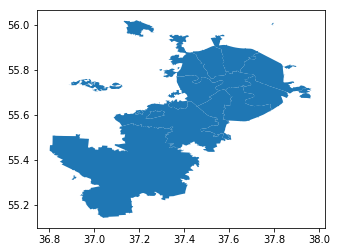

In [56]:
crs = {"init":"epsg:4326"}
#crs = {"init": "epsg:3857"}
spb_street_map_wm = spb_street_map.to_crs(crs)
print(spb_street_map_wm.crs)
spb_street_map_wm.plot()

In [57]:
spb_street_map_wm.geometry

0     POLYGON ((37.5139298 55.7584219, 37.5156656 55...
1     (POLYGON ((37.6502992 55.7933682, 37.6504231 5...
2     POLYGON ((37.5192349 55.9419381, 37.5201963 55...
3     (POLYGON ((37.3313205 55.9338701, 37.334963 55...
4     POLYGON ((37.3320437 55.84594830000001, 37.332...
5     POLYGON ((37.0872002 55.5904847, 37.0874954 55...
6     (POLYGON ((37.6606903 55.7307034, 37.6608171 5...
7     POLYGON ((37.5697983 55.6080693, 37.5699163 55...
8     POLYGON ((37.4557187 55.6370488, 37.4637211 55...
9     (POLYGON ((36.8031012 55.4408329, 36.8031903 5...
10    (POLYGON ((36.8880788 55.7344361, 36.8885414 5...
11    POLYGON ((37.1316021 56.0164459, 37.1326592 56...
Name: geometry, dtype: geometry

,address,area,price,longtitude,latitude,geometry
0,"Москва, ул. Сущёвский Вал, 55",155.0,286000,55.793698,37.614410,POINT (37.61441 55.793698)
1,"Москва, пос. Московский, дер. Румянцево, д. 2,...",75.4,116428,55.633963,37.425468,POINT (37.425468 55.633963)
2,"Москва, Ленинский пр-т, 95Б",106.1,282752,55.672905,37.524318,POINT (37.524318 55.672905)
3,"Москва, Конаковский пр.",82.0,206024,55.845911,37.482151,POINT (37.482151 55.845911)
4,"Москва, пр-т Ленинградский, ЖК «Царская площадь»",94.5,275132,55.784779,37.562703,POINT (37.562703 55.784779)
5,"Москва, пр-т Вернадского, 60к1",136.0,204507,55.674230,37.495635,POINT (37.495635 55.67423)
6,"Москва, Ордынский туп., д. 4А",151.2,1164749,55.741227,37.623250,POINT (37.62325 55.741227)
7,"Москва, Россия, Москва, Москва, Смоленская пл,...",117.0,1110256,55.751467,37.598079,POINT (37.598079 55.751467)
8,"Москва, пр-д 3-й Автозаводский, вл. 13",62.6,241807,55.707522,37.655912,POINT (37.655912 55.707522)
9,"Москва, Москва, Кронштадтский бульвар, 6к4",64.0,249219,55.840730,37.494404,POINT (37.494404 55.84073)


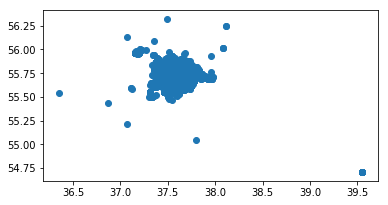

In [58]:
#geometry = [Point(xy) for xy in zip(df.latitude, df.longtitude)]
points = [Point(xy) for xy in zip(df.latitude, df.longtitude)]

geo_df = gpd.GeoDataFrame(flats_df, geometry=points, crs=crs)
geo_df.plot()
geo_df

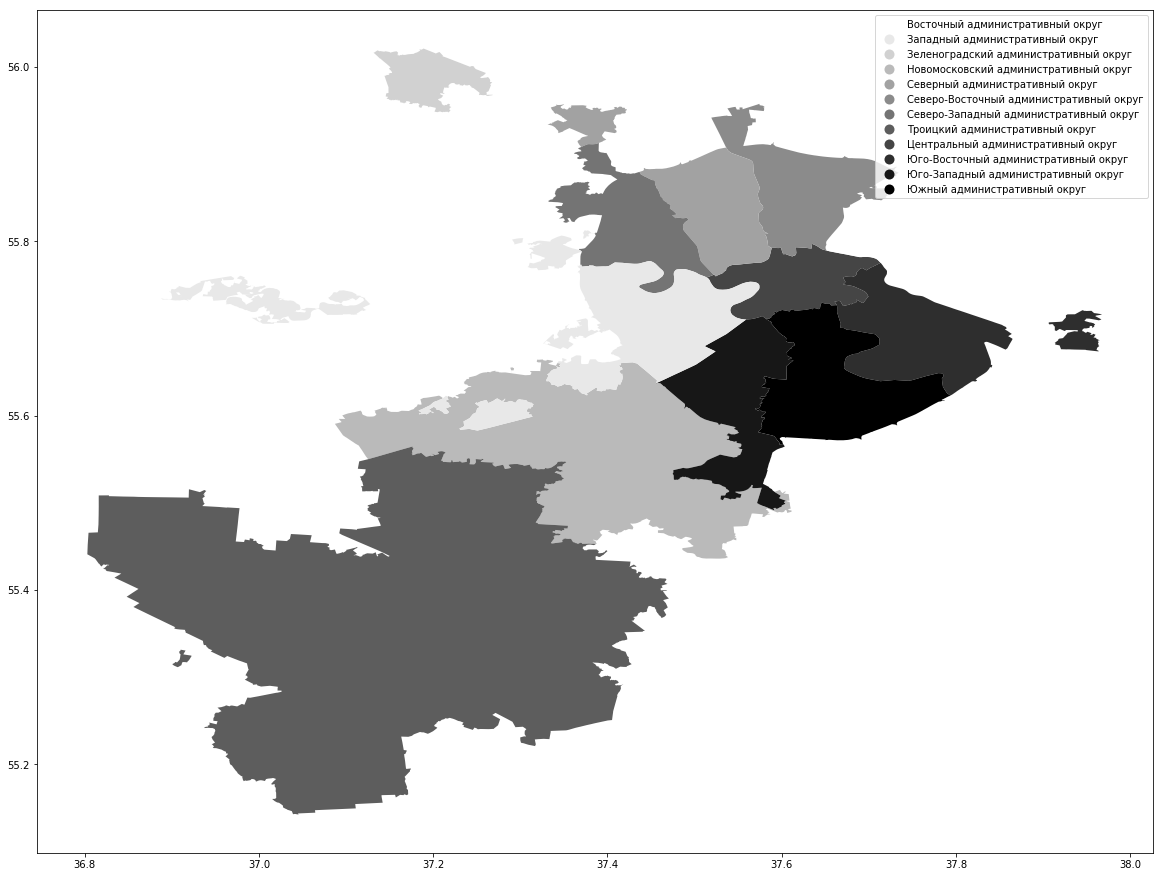

In [59]:
fig, ax = plt.subplots(figsize=(20,20))
spb_street_map_wm.plot(ax=ax, column = 'locname', linewidth=0.5, cmap='binary', legend=True)

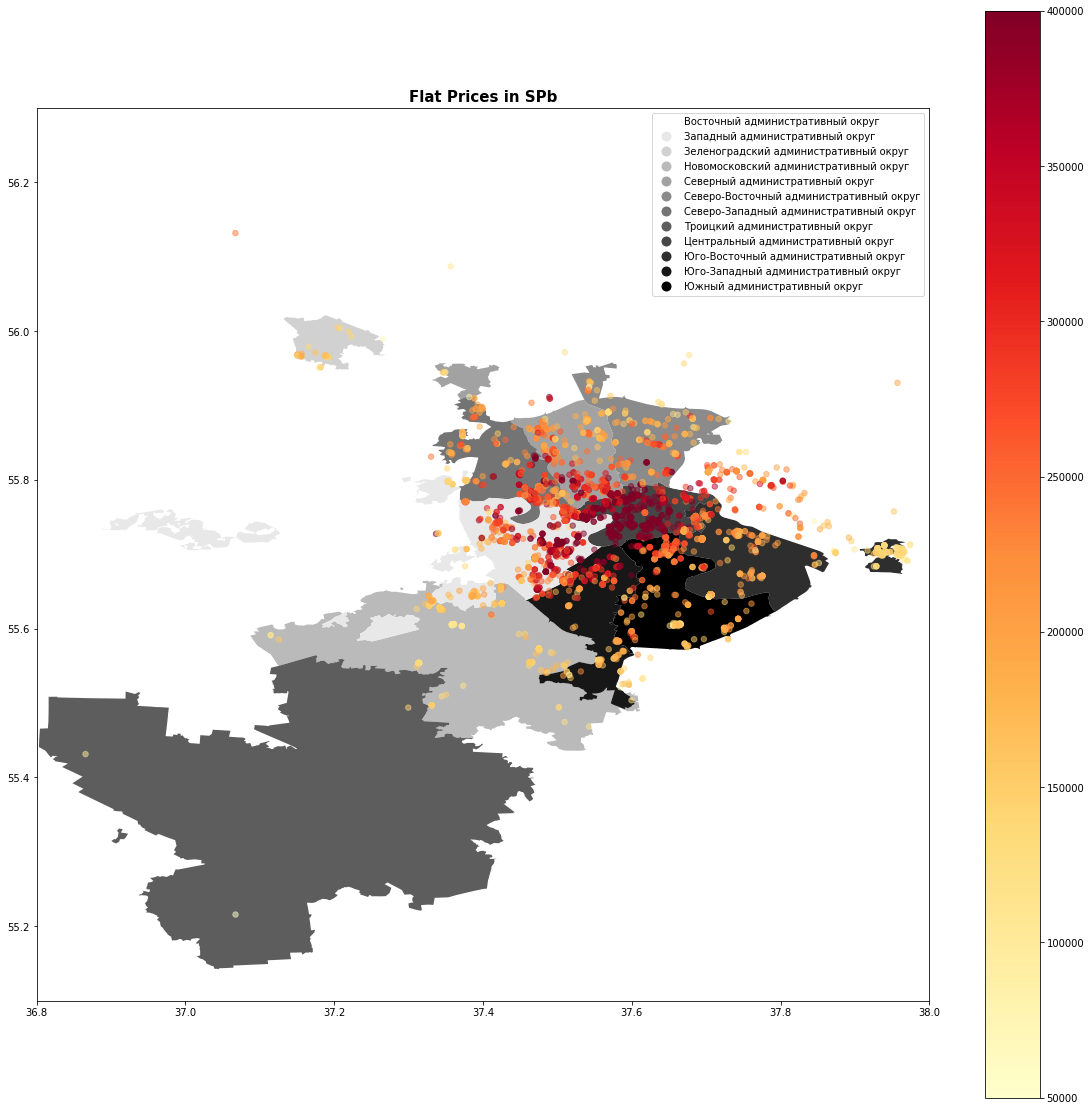

In [67]:
fig, ax = plt.subplots(figsize=(20,20))
spb_street_map_wm.plot(ax=ax, column = 'locname', linewidth=0.5, cmap='binary', legend=True)
geo_df.plot(column="price",ax=ax, alpha=0.5, legend=True, markersize=30, cmap="YlOrRd", vmin=50000, vmax=400000)
plt.title("Flat Prices in SPb", fontsize=15, fontweight="bold")
#plt.ylim(8320000,8460000)
#plt.xlim( 3280000,3420000)
plt.ylim(55.1, 56.3)
plt.xlim( 36.8, 38.0)
plt.show()

In [71]:
d = {}

for point in geo_df.geometry:    
    for i, geometry in enumerate(spb_street_map.geometry):
        if point.within(geometry):
            if d.get(spb_street_map.locname[i], None) is None:
                d[spb_street_map_wm.locname[i]] = [geo_df.price[i]]
            else:
                d[spb_street_map_wm.locname[i]].append(geo_df.price[i])

In [72]:
from functools import reduce
sr_d = {}
for k, lst in d.items():
    sr_d[k] = reduce(lambda a, b: a + b, lst) / len(lst) 
    
#sr_d

{'Северо-Восточный административный округ': 282752.0,
 'Новомосковский административный округ': 204507.0,
 'Юго-Западный административный округ': 241807.0,
 'Северный административный округ': 206024.0,
 'Западный административный округ': 129567.0,
 'Центральный административный округ': 286000.0,
 'Южный административный округ': 1110256.0,
 'Юго-Восточный административный округ': 1164749.0,
 'Северо-Западный административный округ': 275132.0,
 'Восточный административный округ': 116428.0,
 'Зеленоградский административный округ': 136941.0,
 'Троицкий административный округ': 249219.0}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

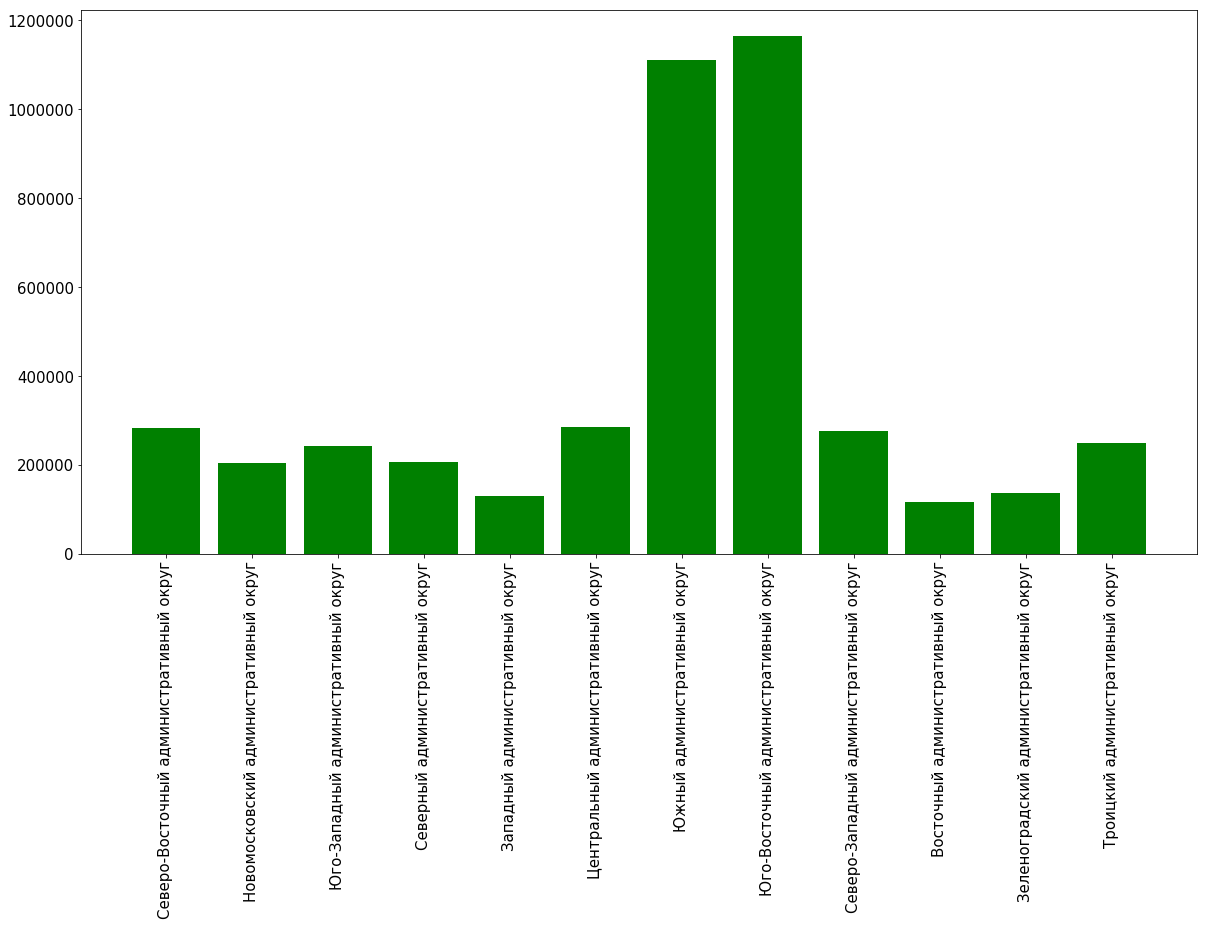

In [73]:
plt.figure(figsize=(20,10))
plt.bar(sr_d.keys(), sr_d.values(), color='g')
plt.tick_params(labelsize=15)
plt.xticks(rotation=90)

In [74]:
#  Визуализация по средней площади квартиры

In [76]:
d = {}

for point in geo_df.geometry:
    for i, geometry in enumerate(spb_street_map.geometry):
        if point.within(geometry):
            if d.get(spb_street_map_wm.locname[i], None) is None:
                d[spb_street_map.locname[i]] = [geo_df["area"][i]]
            else:
                d[spb_street_map.locname[i]].append(geo_df["area"][i])

In [77]:
sr_d = {}
for k, lst in d.items():
    sr_d[k] = reduce(lambda a, b: a + b, lst) / len(lst) 
    
#sr_d

{'Северо-Восточный административный округ': 106.09999999999953,
 'Новомосковский административный округ': 136.0,
 'Юго-Западный административный округ': 62.60000000000022,
 'Северный административный округ': 82.0,
 'Западный административный округ': 57.0,
 'Центральный административный округ': 155.0,
 'Южный административный округ': 117.0,
 'Юго-Восточный административный округ': 151.19999999999925,
 'Северо-Западный административный округ': 94.5,
 'Восточный административный округ': 75.39999999999978,
 'Зеленоградский административный округ': 30.200000000000014,
 'Троицкий административный округ': 64.0}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

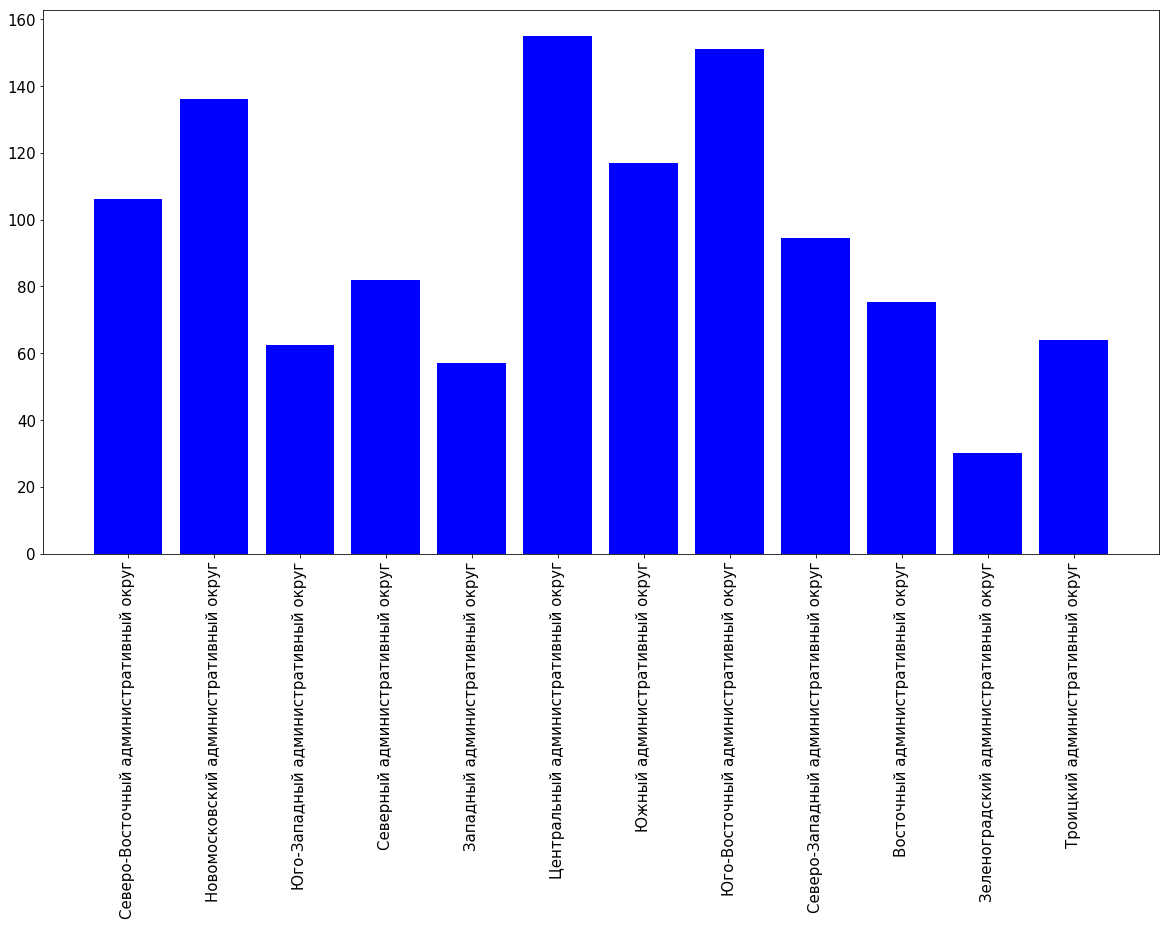

In [78]:
plt.figure(figsize=(20,10))
plt.bar(sr_d.keys(), sr_d.values(), color='b')
plt.tick_params(labelsize=15)
plt.xticks(rotation=90)

In [32]:
# Визуализация с помощью folium

In [33]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [34]:
def data_unq(df):
    l_addr = len(df.address.unique())
    l_lon = len(df.longtitude.unique())
    l_lat = len(df.latitude.unique())
    l_price = len(df.price.unique())
    print(f"l_addr: {l_addr}, l_lon: {l_lon}, l_lat: {l_lat}, l_price: {l_price}")

data_unq(flats_df)

l_addr: 2232, l_lon: 1500, l_lat: 1496, l_price: 3280


In [35]:
max_price = float(flats_df.price.max())
min_price = float(flats_df.price.min())
max_price, min_price

(2837394.0, 50000.0)

In [36]:
location = [55.793698, 37.614410]
mymap = folium.Map(location=location, zoom_start=10)
mc = MarkerCluster()
lon, lat = 'longtitude', 'latitude'

for _, row in flats_df.iterrows():
    mc.add_child(folium.Marker(location=[row[lon], row[lat]]))
    mymap.add_child(mc)
mymap

In [38]:
lon = flats_df.longtitude.values.astype(float)
hmap = HeatMap(l_data, min_opacity=0.2, max_val=max(price), radius=10, blur=10, max_zoom=1,)
hmap.add_to(mymap)
mymap
lat = flats_df.latitude.values.astype(float)
price = flats_df.price.values.astype(float)
lat, lon, price
l_data = list(zip(lon, lat, price))
#l_data

In [39]:
hmap = HeatMap(l_data, min_opacity=0.2, max_val=max(price), radius=10, blur=10, max_zoom=1,)
hmap.add_to(mymap)
mymap

In [ ]:
#hmap = HeatMap(l_data, max_val=max(price)*0.7, radius=5, blur=15, min_opacity=0.2)
#hmap.add_to(mymap)
#mymap